In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
df_X=pd.DataFrame(X)
y_vals=np.array(y)
Xtrain = X[:9900]
Xtest = X[9900:]
ytrain = y[:9900]
ytest = y[9900:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
dir(clf)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'fit_transform',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'transform',
 'verbose',
 'warm_start']

array([[ 0.51612414, -0.03407962, -0.07915684,  0.00405444, -0.04846455,
        -0.61914256, -0.02032083, -0.11794372, -0.65193273, -0.05508235]])

In [5]:
from sklearn import metrics
import pandas as pd
%matplotlib inline

df_X=pd.DataFrame(X)
df_X['score']=clf.predict_proba(df_X)[:,1]
df_X['outcome']=y_vals


In [6]:
def p(beta,x):
    return 1/(1 + np.exp(-np.dot(beta,x)))

def log_like(X,y,beta):
    vals = [y[i]*np.log(p(beta,X[i])) + (1-y[i])*np.log(1-p(beta,X[i])) for i in range(len(X))]
    return np.sum(vals)

In [7]:
log_like(X,y,clf.coef_)

-3885.0144621988256

In [97]:
log_like(X,y,clf.coef_-0.1)

-3756.8278047138433

In [38]:
logs = []
coefs=[]
for i in range(1,20):
    coef = clf.coef_[0]*np.sin(i/7)
    coefs.append(i)
    logs.append(log_like(X,y,coef))
    

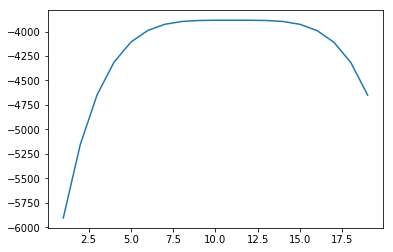

In [41]:
import matplotlib.pyplot as plt
plt.plot(coefs,logs)

In [21]:
clf.coef_[0]

array([ 0.15126347,  0.3734576 , -0.0322838 , -0.21999793, -0.03405179,
       -0.22360951,  0.00567198, -1.31276682,  0.03643517,  0.2148952 ])

In [ ]:
plt.plot(coefs,logs)

In [87]:
clf.coef_

array([[ 0.51612414, -0.03407962, -0.07915684,  0.00405444, -0.04846455,
        -0.61914256, -0.02032083, -0.11794372, -0.65193273, -0.05508235]])

0.0


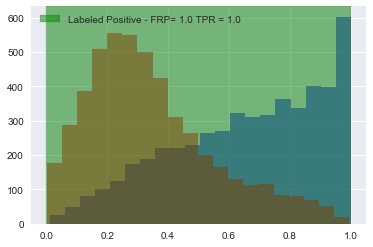

0.1


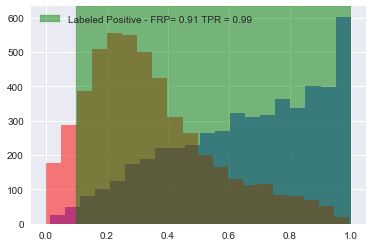

0.2


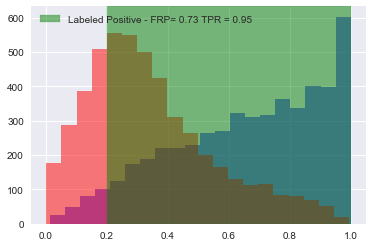

0.3


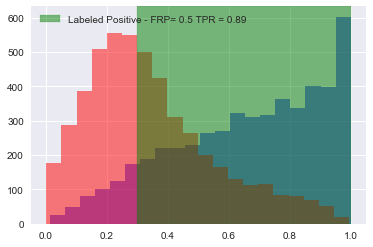

0.4


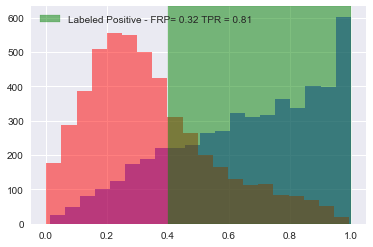

0.5


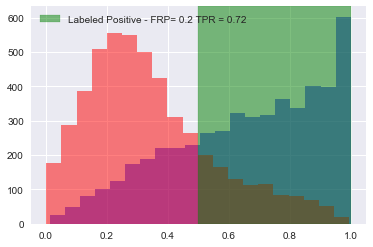

0.6


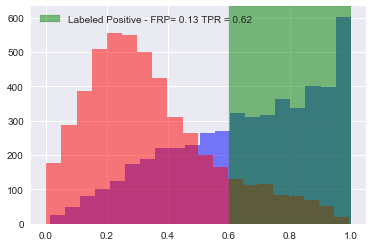

0.7


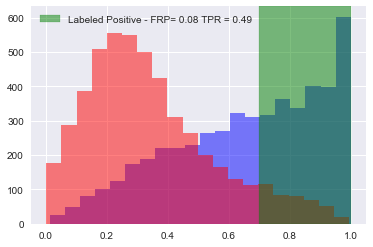

0.8


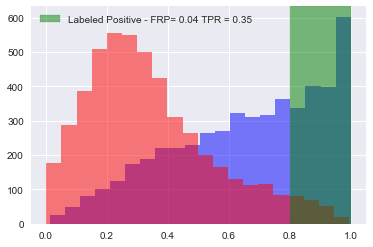

0.9


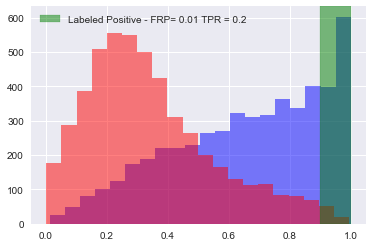

1.0


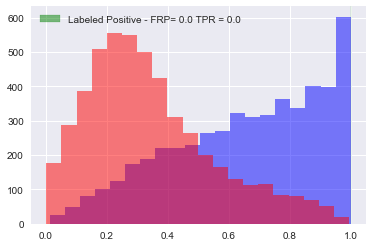

In [72]:
import seaborn
import matplotlib.pyplot as plt
fprs=[]
tprs=[]
for i in range(0,11):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    fpr = np.round(len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==0]),2)
    tpr = np.round(len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==1]),2)
    fprs.append(fpr)
    tprs.append(tpr)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - FRP= ' + str(fpr)+' TPR = ' + str(tpr))
    plt.legend()
    plt.savefig("../img/roc_" + str(i) + ".png")
    plt.show()



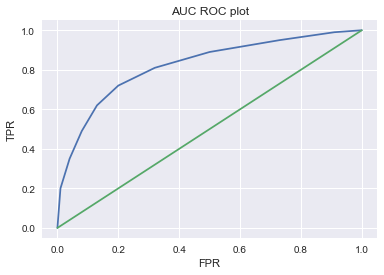

In [75]:
plt.title('AUC ROC plot')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.plot(fprs,tprs)
plt.plot(fprs,fprs)
plt.savefig('../img/roc_final.png')

0.0


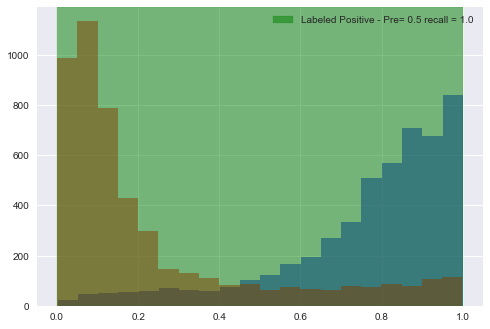

0.1


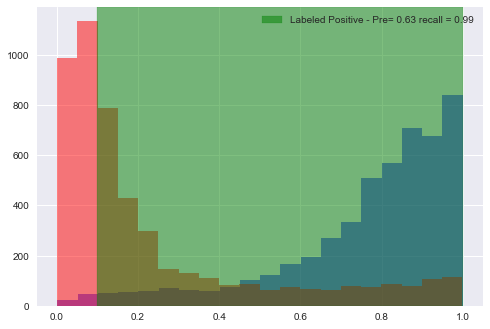

0.2


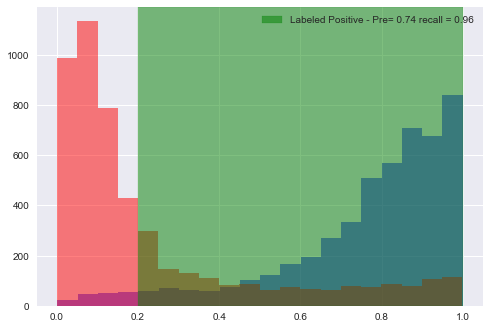

0.3


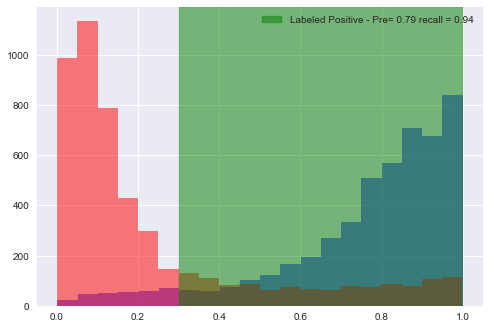

0.4


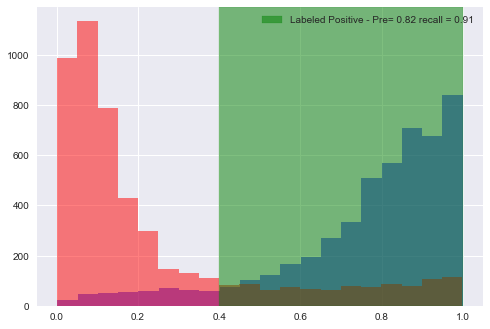

0.5


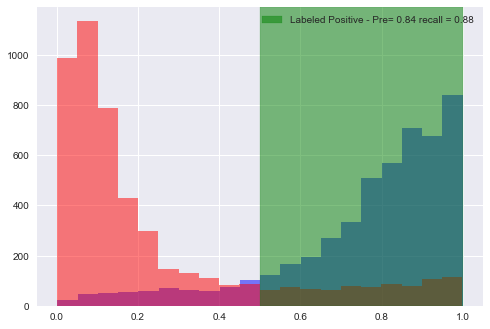

0.6


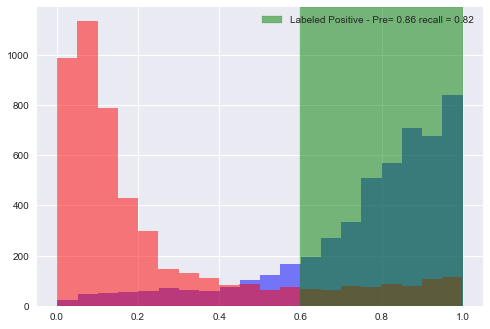

0.7


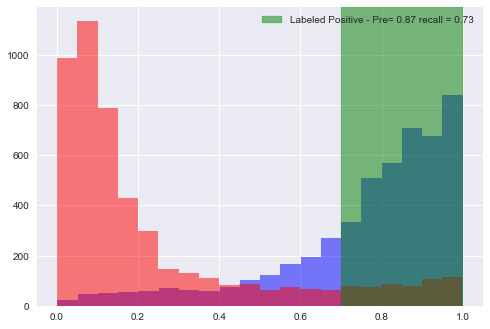

0.8


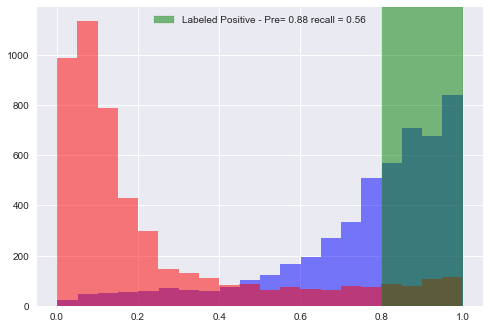

0.9


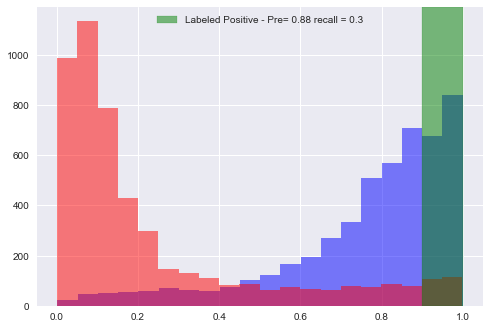

In [55]:
import seaborn
import matplotlib.pyplot as plt
precisions=[]
recalls=[]
for i in range(0,10):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    tp=len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])
    fp = len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])
    fn = len(df_X[(df_X['outcome']==1) & (df_X['score']<threshold)])
    precision = np.round(tp/(tp+fp),2)
    recall = np.round(tp/(tp+fn),2)
    precisions.append(precision)
    recalls.append(recall)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - Pre= ' + str(precision)+' recall = ' + str(recall))
    plt.legend()
    plt.savefig("../img/prec_recall_" + str(i) + ".png")
    plt.show()


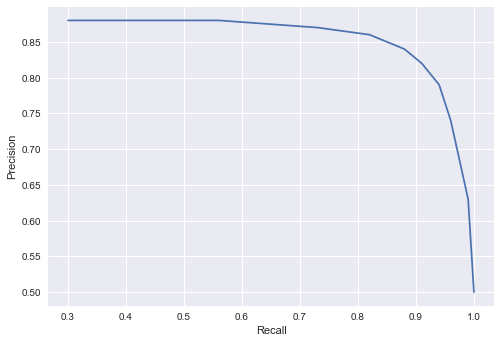

In [56]:

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recalls,precisions)

In [46]:
recalls

[1.0,
 0.9859943977591037,
 0.963985594237695,
 0.938375350140056,
 0.9141656662665066,
 0.8791516606642658,
 0.8217286914765907,
 0.728891556622649,
 0.5598239295718287,
 0.30392156862745096]

In [47]:
precisions

[0.4998,
 0.6309859154929578,
 0.7431744562702453,
 0.7937045185310543,
 0.8236884802595997,
 0.8446751249519415,
 0.8597446095876072,
 0.8702818920210225,
 0.8779416379039849,
 0.875]

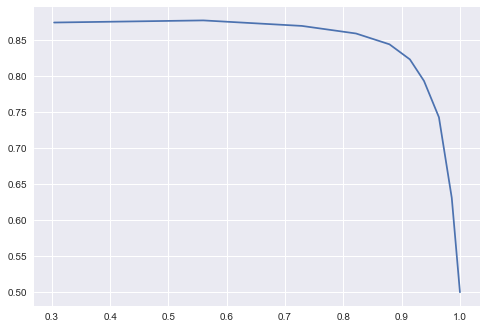

In [49]:
plt.plot(recalls,precisions)